Возьмем датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
Оставим два признака - sepal_length и sepal_width и целевую переменную - variety
Построим модель LDA

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
# загружаем данные в датафрейм
df =pd.DataFrame(iris.data, columns =iris.feature_names)
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
data_class = iris.target
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# разделение выборки на тестовую и тренировочную
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df, data_class, random_state = 37)

In [ ]:
#импортируем LDA  библиотеку
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [ ]:
#обучаем модель
lda.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

In [ ]:
# разница факта и прогноза
result = pd.DataFrame([Y_test,lda.predict(X_test)]).T
result

,0,1
0,1,1
1,0,0
2,2,2
3,2,2
4,0,0
5,1,1
6,0,0
7,2,2
8,2,2
9,2,2


In [ ]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,lda.predict(X_test))

1.0

In [ ]:
# визуализируем дискриминантные линии по 2 признакам
small_train = X_train[['sepal length (cm)', 'sepal width (cm)']]
small_test = X_test[['sepal length (cm)', 'sepal width (cm)']]

In [ ]:
#получение центоидов
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train,Y_train)


LinearDiscriminantAnalysis()

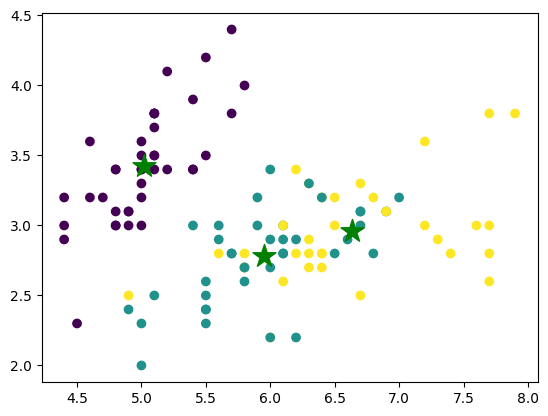

In [ ]:
# визуализация тренировочных данных
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c= Y_train)# c - colour
#centroids
plt.scatter(lda_small.means_[:,0], lda_small.means_[:,1], c='g', s = 300, marker ='*')

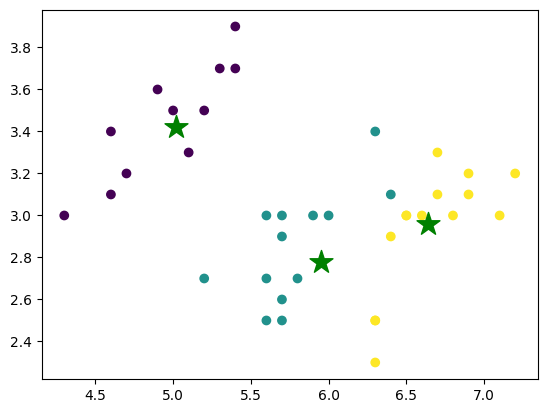

In [ ]:
# визуализация разделения на тесте
plt.scatter(small_test['sepal length (cm)'], small_test['sepal width (cm)'], c=lda_small.predict(small_test))
# центроиды (геометрические центры данных)
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='g', s=300, marker='*')

Отбросим целевую переменную и оставим только два признака - sepal_length и sepal_width
Подберем оптимальное число кластеров для алгоритма kmeans и визуализируем

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

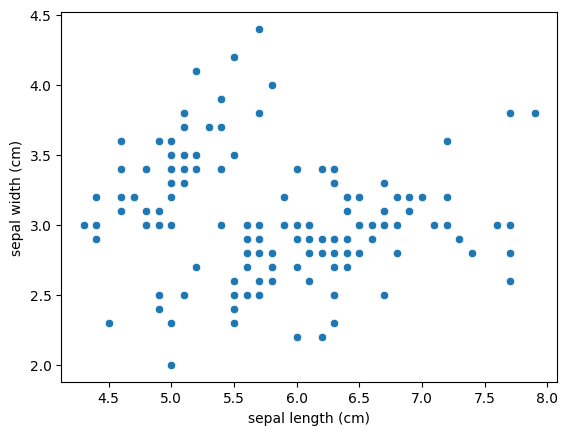

In [ ]:
dat =df[['sepal length (cm)', 'sepal width (cm)']]
sns.scatterplot(x = dat['sepal length (cm)'], y = dat['sepal width (cm)'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

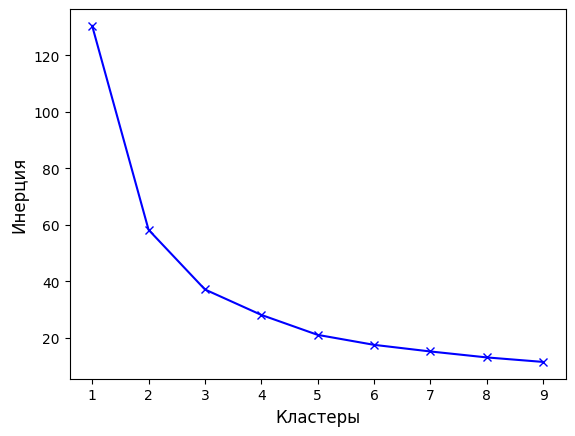

In [ ]:
from sklearn.cluster import KMeans

# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов и возвращает инерцию
def get_inertia(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num,  random_state=42)
    k_means.fit(dat)
    inertia = k_means.inertia_
    return inertia

inertia = []
for cluster_num in range(1, 10):
    inertia.append(get_inertia(cluster_num, dat))

# визуализируем, как менялась инерция в зависимости от количества кластеров
plt.xlabel("Кластеры", fontsize=12)
plt.ylabel("Инерция", fontsize=12)
plt.plot([i for i in range(1, 10)], inertia, 'xb-')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-84-dc071a8e4a94>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['clusters'] = predictions


<Axes: >

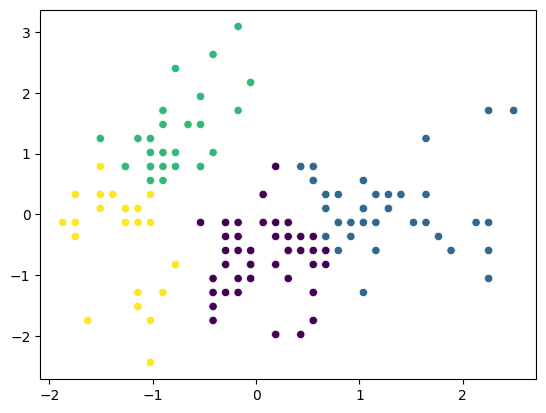

In [ ]:
# было выбрано 4 кластера
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xscaled =scaler.fit_transform(dat)

kmeans = KMeans(n_clusters=4, random_state = 3)

predictions = kmeans.fit_predict(dat)
predictions  =kmeans.labels_

dat['clusters'] = predictions

sns.scatterplot(x=Xscaled[:,0], y =Xscaled[:,1], c =predictions)
